## A/B-тестирование в интернет-магазине

**Описание проекта** \
Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.
В первой части исследования мне необходимо приоритезировать гипотезы, во второй - запустить A/B-тест и проанализовать результаты. 

**Данные для первой части**: \
Hypothesis — краткое описание гипотезы; \
Reach — охват пользователей по 10-балльной шкале; \
Impact — влияние на пользователей по 10-балльной шкале; \
Confidence — уверенность в гипотезе по 10-балльной шкале; \
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы. \
**Данные для второй части**: \
transactionId — идентификатор заказа; \
visitorId — идентификатор пользователя, совершившего заказ; \
date — дата, когда был совершён заказ; \
revenue — выручка заказа; \
group — группа A/B-теста, в которую попал заказ. \
Файл /datasets/visitors.csv. Скачать датасет \
date — дата; \
group — группа A/B-теста; \
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [6]:
#загружаем все необходимые для проекта библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
import scipy.stats as stats

In [7]:
# загружаем и смотрим файл с гипотезами
hypo = pd.read_csv('/.../hypothesis.csv')
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [8]:
#приводим гипотезы в читаемый вид для изучения
hypo['Hypothesis'].to_list()

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

### Применяем фреймворк ICE для приоритизации гипотез

Два основных фреймворка для приоритезациии гипотез имеют следующие формулы:

</ul></div> <br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$


In [9]:
hypo['ICE'] = (hypo['Impact'] * hypo['Confidence'])/hypo['Efforts']
hypo[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


ICE показал, что наиболее приоритетными гипотезами являются запуск акций в день рождения, добавление новых каналов привлечения пользователей и добавление подписки.

### Применяем фреймворк RICE для приоритизации гипотез

In [10]:
hypo['RICE'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence'])/hypo['Efforts']
hypo[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Вывод:** RICE сместил вниз гипотезу об акциях на день рождения, так как она захватывает совсем небольшое число клиентов. Теперь наиболее приоритетной гипотезой является введение подписки. На втором месте - добавление рекомендации. И третье место делят 2 гипотезы - добавление новых канало привлечнения трафика и отображение на главной странице баннеров с актуальными акциями и распродажами. Появление в топе гипотез введение рекомендаций связано с тем, что она охватывает большое количество пользователей. **Таким образом, самой приоритетной гипотезой, которую необходимо проверить, с большим отрывом становится введение подписки. Этим мы займемся в следующей части проекта.**

## Анализ A/B-теста

In [11]:
#загружаем и смотрим данные по заказам
orders = pd.read_csv('/.../orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
#загружаем и смотрим данные по пользователям
visitors = pd.read_csv('/.../visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [14]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Всего в АВ-тесте две группы - А и В.

In [15]:
orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

В группе А 503 уникальных пользователя, совершивших заказ, в группе В - 586.

In [16]:
orders['date'].min()

'2019-08-01'

In [17]:
orders['date'].max()

'2019-08-31'

Минимальная дата исследования - 1 августа 2019 года, максимальная - 31 августа 2019 года.

In [18]:
#cоздадим датафрейм, где бы отражались id пользователей, которые есть в двух выборках
orders_A = orders[orders['group'] == 'A']
orders_B = orders[orders['group'] == 'B']
orders_double = orders_A.merge(orders_B, on='visitorId')['visitorId']
orders_double.count()

183

Всего 183 пользователя, которые оказались сразу в двух выборках

In [19]:
#удалим пользователей, которые оказались в обеих выборках
orders = orders[~orders['visitorId'].isin(orders_double)]

In [20]:
orders.duplicated().sum()

0

In [21]:
visitors.duplicated().sum()

0

Дубликатов в данных нет.

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1016 non-null   int64 
 1   visitorId      1016 non-null   int64 
 2   date           1016 non-null   object
 3   revenue        1016 non-null   int64 
 4   group          1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков в данных нет.

### График кумулятивной выручки по группам

In [24]:
#создаем датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [25]:
#создадим переменную с аггрегированными данными по заказам
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [26]:
#создадим переменную с аггрегированными данными по клиентам
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                     visitors['group'] == x['group'])].agg({
    'date' : 'max', 
    'group' : 'max', 
    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [27]:
#создадим общую переменную
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, on=['date', 'group'])
cumulativeData.head() 

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [28]:
#переименуем названия столбцов
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [29]:
#разделим данные по группам теста
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

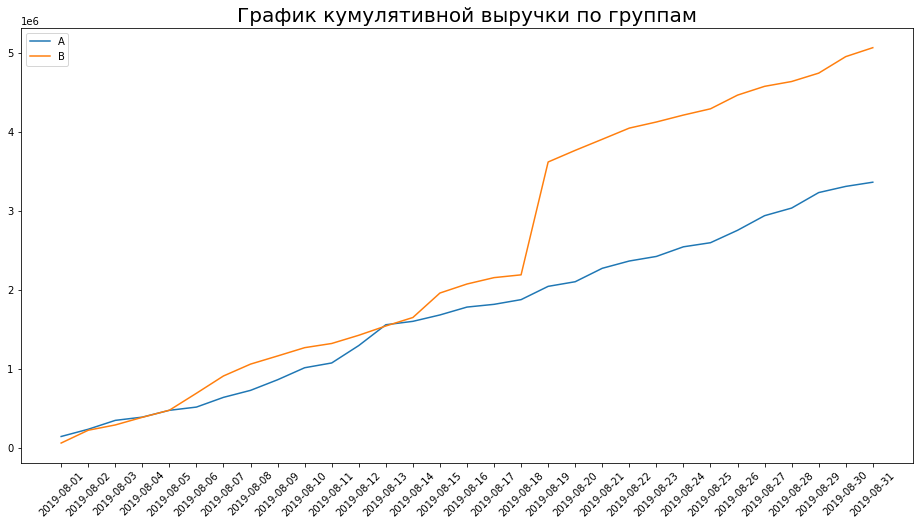

In [30]:
#строим график
plt.figure(figsize=(16,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.legend()
plt.title('График кумулятивной выручки по группам', fontsize=20)
plt.show()

**Вывод:** в первые 2 недели эксперимента выручка группы B в среднем превышала группу A, но не значительно. Все изменилось 19 августа, когда предположительно была совершена аномальная покупка в группе B, из-за чего кумулятивная вырочка в рамках данной группы значительно выросла по сравнению с группой A.

### График кумулятивного среднего чека по группам

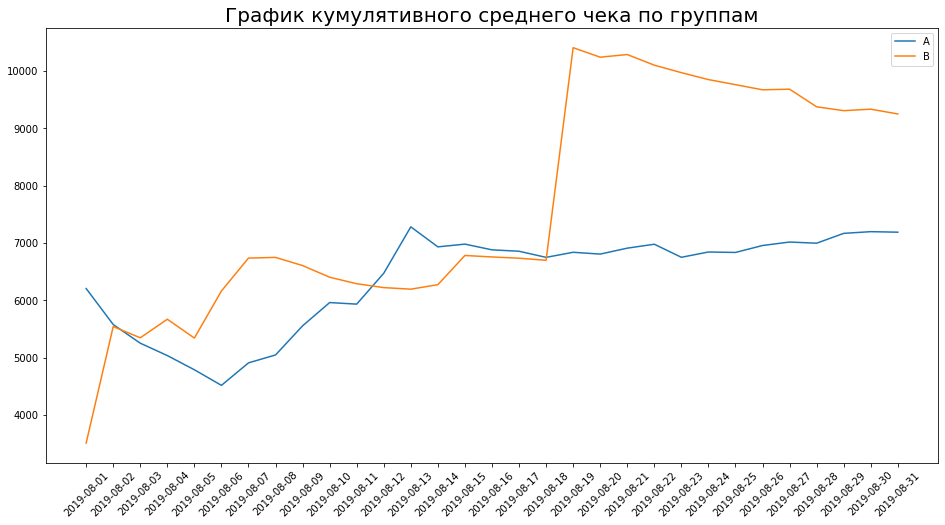

In [31]:
#строим график
plt.figure(figsize=(16,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.legend()
plt.title('График кумулятивного среднего чека по группам', fontsize=20)
plt.show()

**Вывод:** кумулятивный график среднего чека также подверждает, что 19 августа произошла какая-то очень значительная покупка в группе B. Поэтому средний чек в данной группе резко вырос по сравнению с группой A. До 19 августа ситуация была не столь очевидной. На несколько дней средний чек группы A даже превышал группу B. Также интересная тенденция после 19 августа. Средний чек в группе B постепенно снижался, в то время как средний чек в группе A даже немного вырос. Таким образом, без аномального роста 19 августа вполне вероятно, что средний кумулятивный чек в группе A был бы выше, чем в группе B.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

In [32]:
#объединим таблицы по кумулятивным доходам и заказам разных групп
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


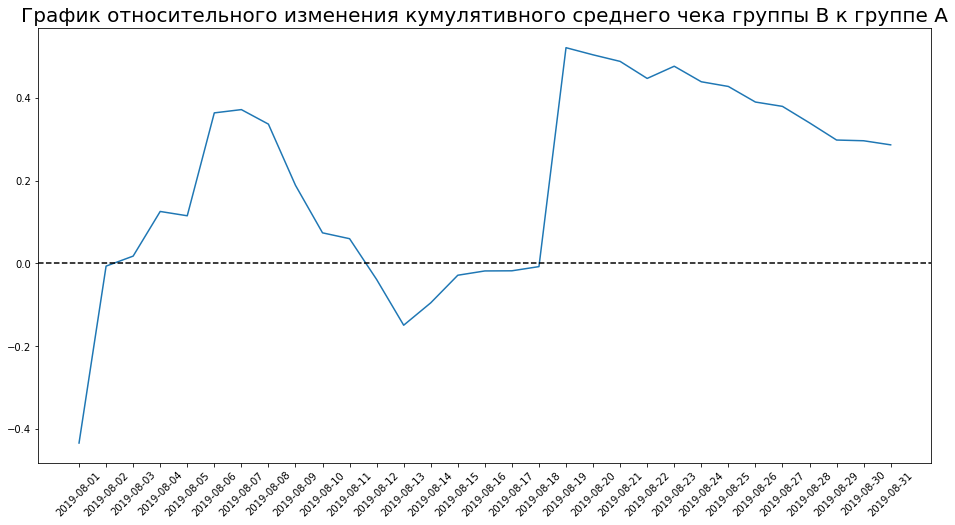

In [33]:
#строим график
plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=20)
plt.show()

**Вывод:** подтверждаются предыдущие тезисы. В начале исследования средний чек группы B был выше, чем в группе A. Потом средний чек в группе А начал увеличиваться и стал незначительно превышать средний чек в группе B. Потом 19 августа средний чек в группе B резко вырос и относительный отрыв от группы А достиг 50%. Однако в дальнейшем отрыв начал снижаться и достиг 30%.

### График кумулятивного среднего количества заказов на посетителя по группам

In [34]:
#создаем 2 таблицы с данными о пользователях и заказах по группам
cumulativeVisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativeVisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

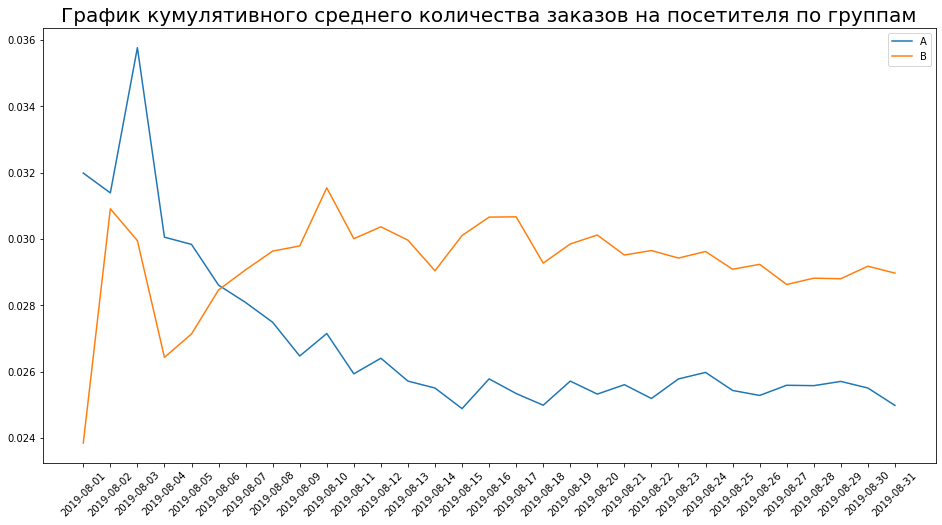

In [35]:
#строим график
plt.figure(figsize=(16,8))
plt.plot(cumulativeVisitorsA['date'], cumulativeVisitorsA['orders']/cumulativeVisitorsA['visitors'], label='A')
plt.plot(cumulativeVisitorsB['date'], cumulativeVisitorsB['orders']/cumulativeVisitorsB['visitors'], label='B')
plt.xticks(rotation = 45)
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=20)
plt.show()

**Вывод:** после флуктуации в начале экперимента среднее число заказов на одного посетителя в группе B стабильно было выше, чем в группе А: ~0,035 заказа против ~0,03 заказа на посетителя.  

###  График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [36]:
#объединяем таблицы с информацией о клиентах и заказах по группам
mergedCumulativeVisitors = cumulativeVisitorsA.merge(cumulativeVisitorsB, 
                                                   on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeVisitors.head()

,date,visitorsA,ordersA,visitorsB,ordersB
0,2019-08-01,719,23,713,17
1,2019-08-02,1338,42,1294,40
2,2019-08-03,1845,66,1803,54
3,2019-08-04,2562,77,2573,68
4,2019-08-05,3318,99,3280,89


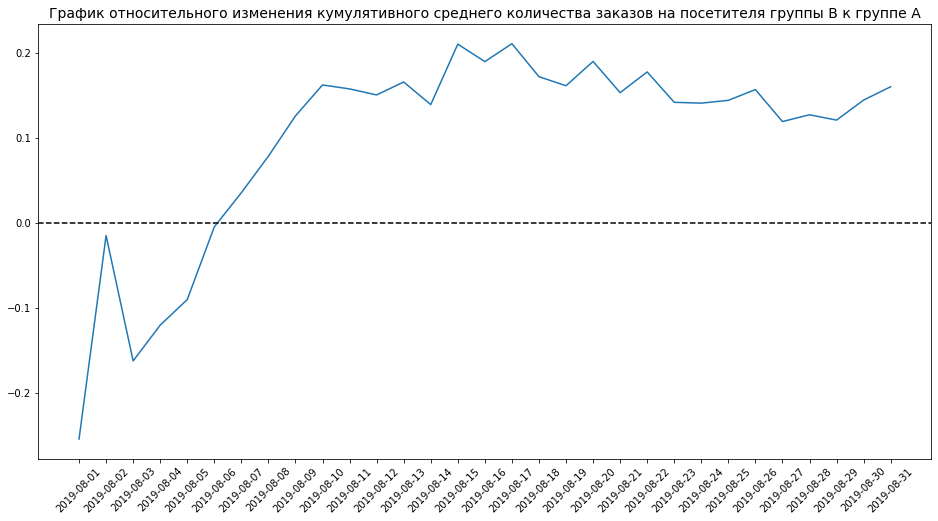

In [37]:
#строим график
plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeVisitors['date'], (
    mergedCumulativeVisitors['ordersB']/mergedCumulativeVisitors['visitorsB'])/(
    mergedCumulativeVisitors['ordersA']/mergedCumulativeVisitors['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=14)
plt.show()

**Вывод:** после флуктуации в начале экперимента среднее число заказов на одного посетителя в группе B стабильно было выше, чем в группе А примерно на 15%

### Точечный график количества заказов по пользователям

In [38]:
#создаем таблицы с количеством заказов на каждого пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.head()

,userId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


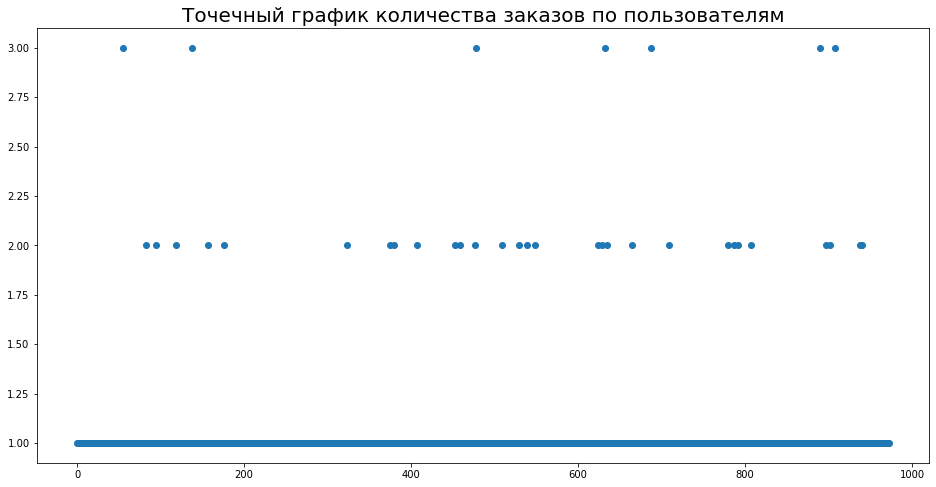

In [39]:
#строим график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(16,8))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям', fontsize=20)
plt.show()

**Вывод:** большинство пользователей совершило только 1 заказ. Небольшая часть - 2 заказа. И лишь совсем незначительное количество - больше двух.

###  95-й и 99-й перцентили количества заказов на пользователя

In [40]:
#95-й перцентиль
np.percentile(ordersByUsers['orders'], 95)

1.0

In [41]:
#99-й перцентиль
np.percentile(ordersByUsers['orders'], 99)

2.0

**Вывод:** 95-ый перцентиль - 2 заказа на человека, 99-ый перцентиль - 4 заказа на человека. Определим границу аномальных пользователей на уровне 3 заказов на пользователя.

### Точечный график стоимостей заказов

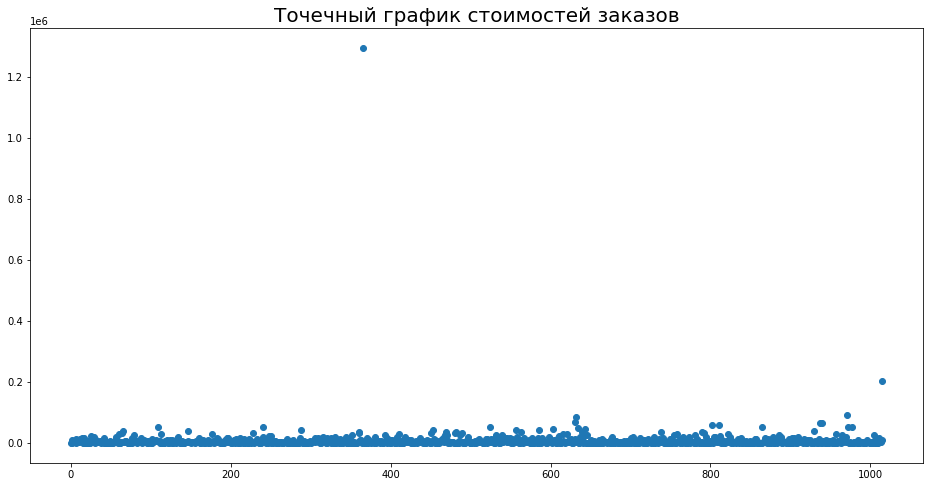

In [42]:
#строим график
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(16,8))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов', fontsize=20)
plt.show()

**Вывод:** на графике виден один аномально большой заказ, из-за которого отображение графика сильно исказилось.

###  95-й и 99-й перцентили стоимости заказов

In [43]:
#95-й перцентиль
np.percentile(orders['revenue'], 95)

26785.0

In [44]:
#99-й перцентиль
np.percentile(orders['revenue'], 99)

53904.0

**Вывод:** 95-ый перцентиль стоимости заказа - 28 тысяч, 99-ый перцентиль - 58 тысяч. Определим границу аномально дорогих заказов на уровне 40 тысяч.

 ### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами по "сырым" данным нет. \
Альтернативная гипотеза: различия в среднем количестве заказов на посетителя между группами по "сырым" данным есть.

In [45]:
#создадим общую таблицу, где бы отражалась информация о заказах, доходах и пользователях по дням и группам для a/b теста
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,23,142779,17,59758,719,713
1,2019-08-02,19,91602,22,162043,619,581
2,2019-08-03,24,112473,14,67049,507,509
3,2019-08-04,11,41176,13,96890,717,770
4,2019-08-05,22,86383,21,89908,756,707


In [46]:
#создаем 2 таблицы с количеством заказов на каждого пользователя по группам
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [47]:
ordersByUsersA.head()

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [48]:
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [49]:
# добавляем к предыдущим таблицам пользователей, которые не совершали ни одного заказа
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                    - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                                    - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [50]:
# узнаем p_value
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# узнаем относительное различие средних двух выборок 
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

0.011
0.160


**Вывод:** первое число - p_value. Оно составляет 1,7%, что ниже уровня статистической значимости. Таким образом, мы можем отвергнуть нулевую гипотезу. При этом относительная разница между средним количеством заказов составляет 14%.

###  Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке заказов между группами по "сырым" данным нет. \
Альтернативная гипотеза: различия в среднем чеке заказов между группами по "сырым" данным есть.

In [51]:
# узнаем p_value
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# узнаем относительное различие средних двух выборок 
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


**Вывод:** первое число - p_value. Оно очень высокое, таким образом, мы не можем отвергнуть нулевую гипотезу. При этом относительное различие средних составляет 25,9%. Предположительно, большое p-value связано с высокой дисперсией средних значений.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами по "очищенным" данным нет. \
Альтернативная гипотеза: различия в среднем количестве заказов на посетителя между группами по "очищенным" данным есть.

Сначала очистим данные от аномальных значений. Ранее мы решили, что аномальные пользователи это те, кто совершал от 3 заказов или те, у кого сумма заказа была более 40 тыс.


In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
dtype: int64

In [53]:
#добавим к очишенным данным пользователей, который не совершали заказов
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [58]:
# узнаем p_value
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
# узнаем относительное различие средних двух выборок 
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.004
0.205


**Вывод:** p_value значительно снизилось до 0,7% по сравнению с не очищенными данными. Таким образом, мы с очень большой долей вероятности говорить о наличии значимых различий между выборками и можем отвергнуть нулевую гипотезу.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза: различий в среднем чеке заказов между группами по "очищенным" данным нет.
Альтернативная гипотеза: различия в среднем чеке заказов между группами по "очищенным" данным есть.

In [59]:
#очистим данные от аномалий и сразу узнаем p_value
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], 
        )[1]
    )
)
#очистим данные от аномалий и сразу узнаем относительное различие средних двух выборок 
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.937
0.055


**Вывод:** p_value после удаления аномальных пользователей увеличилось до 93,7%. Мы с очень большой долей вероятности можем сказать, что нулевую гипотезу отвергнуть нельзя на очищенных данных. Относительная разница между чеками в группе составляет около 6%.

### Решение по результатам a/b тестировния

1. Первая часть теста, которая относится к сравнению количества заказов на одного пользователя, как на неочищенных, так и на очищенных данных показала достаточно однозначные результаты. P-value в первом случае равно 1,7%, во втором 0,7%, что ниже уровня статистической значимости. Мы можем отвергнуть нулевую гипотезу и прекратить тест.
2. Вторую часть теста, связанную со сравнением среднего чека между группами, также следует прекратить. После очистки данных p-value составило 94%, а относительная разница среднего всего 5,8%. Статистической значимой разницы между группами на основании среднего чека нет.

# Заключение

1. Первая часть проекта с приоритезацией гипотез показала, что наиболее приоритетной гипотезой по наиболее полному методу RICE оказалась гипотеза о добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. У нее самый большой показатель охвата аудитории и при этом умеренно высокий импакт и уверенность в её результатах.
2. Вторую часть проекта можно в свою очередь также поделить на 2 содержательные части: \
а) Анализ А/B теста, сравнивающего изменение количества покупок на каждого пользователя в разных группах. Тест на неочищенных и на очищенных данных показал, что статистическое различие между выборками является значимым и мы можем отвергнуть нулевую гипотезу. При этом на графиках было видно, что группа B показывает более хорошие результаты по сравнению с группой А на протяжении практически всего теста, а разница средних значений выборок на очищенных данных составила почти 19%. Поэтому было принято решение остановить тестирование и признать значимым статистическое различие между группами. \
б) Анализ А/B теста, сравниваюшего изменение среднего чека в разных группах. На графиках, в которых сравнивались куммулятивные средние чеки, было видно, что средний чек в группе B сильно вырос после 19 августа. Это связано с аномально крупными покупками в этот день. Тест после очистки данных показал, что p_value равно 94,4%. Это значит, что с огромной долей вероятности нулевую гипотезу нельзя отклонить и не имеют статистически значимой разницы. Поэтому было принято решение остановить эту часть теста.